In [21]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

## Connection to db

In [22]:
db_con = sqlite3.connect('../data/checking-logs.sqlite.sqlite')

## analyze only the users and not the admins

In [23]:
table = pd.io.sql.read_sql("select timestamp from checker WHERE uid LIKE 'user_%'", db_con, parse_dates='timestamp')
table['date'] = table['timestamp'].dt.date
table['hour'] = table['timestamp'].dt.hour
table['dayofweek'] = table['timestamp'].dt.dayofweek
table['day'] = table['dayofweek'].apply(lambda x: 'weekend' if x > 4 else 'working_day')
table

,timestamp,date,hour,dayofweek,day
0,2020-04-17 05:19:02.744528,2020-04-17,5,4,working_day
1,2020-04-17 05:22:35.249331,2020-04-17,5,4,working_day
2,2020-04-17 05:22:45.549397,2020-04-17,5,4,working_day
3,2020-04-17 05:34:14.691200,2020-04-17,5,4,working_day
4,2020-04-17 05:34:24.422370,2020-04-17,5,4,working_day
...,...,...,...,...,...
3202,2020-05-21 20:19:06.872761,2020-05-21,20,3,working_day
3203,2020-05-21 20:22:41.785725,2020-05-21,20,3,working_day
3204,2020-05-21 20:22:41.877806,2020-05-21,20,3,working_day
3205,2020-05-21 20:37:00.129678,2020-05-21,20,3,working_day


## create two lists of values (for working days and for weekends) for the histogram input

In [24]:
working_day = list(table[table['day'] == 'working_day']['hour'])
len(working_day)

2037

In [25]:
weekend = list(table[table['day'] == 'weekend']['hour'])
len(weekend)

1170

## the figsize is still the same, you can choose the fontsize as well as the color palette
##  use a level of transparency for the histogram in front equal to 0.7

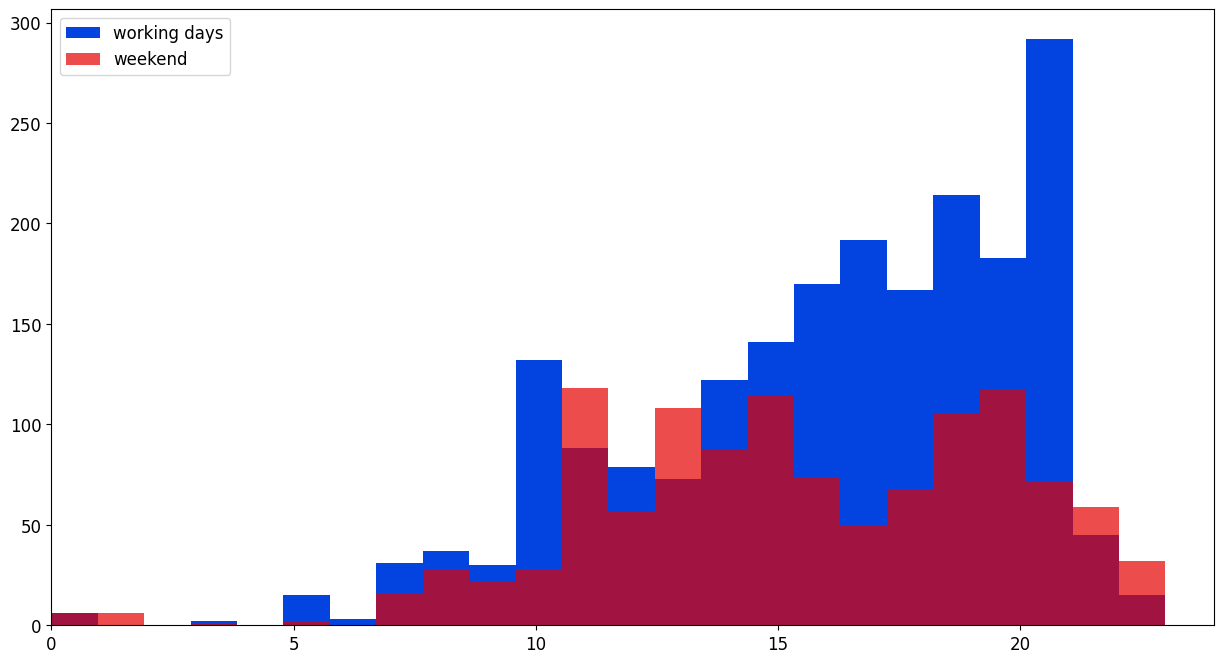

In [26]:
fig, ax = plt.subplots(figsize=(15, 8))
plt.rc('font', size=12)
ax.hist(working_day, bins=24, color='xkcd:blue', label='working days')
ax.hist(weekend, bins=24, alpha=0.7, color='xkcd:red', label='weekend')
ax.legend()
ax.set_xlim(0, 24)
plt.show()

## Are there hours when the total number of commits was higher on weekends than on working days?

11, 13, 22, 23